## Introduction

By [Albert Novanto](https://github.com/albertn15)
Hck-015

Tablue [click](https://public.tableau.com/views/Book1_17122311853230/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link)

### Dataset

Dataset yang digunakan dalam project ini adalah dataset Car Sales Report. Dataset ini berisi 23906 baris dengan 15 kolom yang diantaranya adalah car_id,tanggal,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no,body_style,phone,dealer_region
. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/datasets/missionjee/car-sales-report/code).
Keterangan pada kolom pada dataset ini adalah:

| Feature                 | Description                                                                                                                                                    |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| car_id                  | Unique identifier for each car in the dataset.                                                                                                                 |
| tanggal                 | Date of the car sale transaction.                                                                                                                              |
| customer_name           | Name of the customer purchasing the car.                                                                                                                       |
| gender                  | Gender of the customer (e.g., Male, Female).                                                                                                                   |
| annual_income           | Annual income of the customer.                                                                                                                                 |
| dealer_name             | Name of the car dealer associated with the sale.                                                                                                               |
| company                 | Company or brand of the car.                                                                                                                                   |
| model                   | Model name of the car.                                                                                                                                         |
| engine                  | Specifications of the car's engine.                                                                                                                            |
| Transmission            | Type of transmission in the car (e.g., Automatic Manual).                                                                                                      |
| Color                   | Color of the car's exterior.                                                                                                                                   |
| Price                   | Listed price of the car for sale.                                                                                                                              |
| Dealer_No               | Dealer identification number associated with the sale.                                                                                                         |
| Body Style              | Style or design of the car's body (e.g., Sedan, SUV).                                                                                                          |
| Phone                   | Contact phone number associated with the car sale.                                                                                                             |
| Dealer_Region           | Geographic region or location of the car dealer.                                                                                                               |

# **Identifikasi Masalah**



## Problem Statement:

Perusahaan mobil beto ingin memahami tren dan pola penjualan mobil di pasar yang kompetitif. Untuk mencapai tujuan ini, perusahaan membutuhkan analisis yang mendalam untuk memahami preferensi pelanggan, tren harga, dan efek spesifikasi mobil terhadap penjualan.




## **SMART**:

* Specific: memaksimalkan penjualan mobil dan memenuhi kebutuhan pelanggan   berdasarkan spesifikasi, harga, dan preferensi pelanggan. 
* Measurable: Meningkatkan penjualan mobil 5% sebagai metrik keberhasilan. 
* Achievable: analisis data menggunakan teknik-teknik statistik yang tepat, seperti visualisasi data, analisis regresi, dan klasifikasi. 
* Relevant: Menganalisis tren dan pola penjualan mobil akan membantu perusahaan mobil memahami preferensi pelanggan, mengembangkan strategi penjualan yang tepat, dan meningkatkan penjualan mobil.
* Time-bound: Analisis ini harus diselesaikan dalam waktu 2 minggu.

### Penjabaran masalah dengan metode 5W+1H:

* Kapan mobil jenis apa yang paling banyak terjual?
* Di mana lokasi penjualan mobil tertinggi?
* Berapa harga rata-rata mobil yang paling banyak terjual?
* Bagaimana strategi pemasaran yang efektif untuk meningkatkan penjualan mobil?

# *Data Loading*

## Import Library

Mengimport semua library yang akan digunakan, dalam project ini menggunakan **psycopg2**, **pandas**, **seaborn**, **matplotlib**, **stats**, **plotly**,**numpy** dan **SciPy**.

In [146]:
# import libraries
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import plotly.express as px
import numpy as np
plt.style.use('ggplot')


Membuat dataframe dari file `car_data.csv`.

In [147]:
# connect SQL
db_user = "postgres"
db_password = "1234" #Use your own password
db_host = "localhost"  # Usually "localhost" if running locally
db_port = "5432" 

connection = psycopg2.connect(
    user=db_user,
    password = db_password,
    host = db_host,
    port = db_port,
    database = "mile"
)

cursor = connection.cursor()
query = "select * from car_data"

# import data from table SQL
data = pd.read_sql(query, connection)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15520\1712536991.py:19: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Menampilkan 5 baris teratas dari dataframe.

In [148]:
data.head()

,car_id,tanggal,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,dealer_no,body_style,phone,dealer_region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


### Data Characteristics

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_id         23906 non-null  object
 1   tanggal        23906 non-null  object
 2   customer_name  23906 non-null  object
 3   gender         23906 non-null  object
 4   annual_income  23906 non-null  int64 
 5   dealer_name    23906 non-null  object
 6   company        23906 non-null  object
 7   model          23906 non-null  object
 8   engine         23906 non-null  object
 9   transmission   23906 non-null  object
 10  color          23906 non-null  object
 11  price          23906 non-null  int64 
 12  dealer_no      23906 non-null  object
 13  body_style     23906 non-null  object
 14  phone          23906 non-null  int64 
 15  dealer_region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Dataset ini terdiri dari:
* 3 kolom dengan tipe data **integer**
* 13 kolom dengan tipe data **object**

In [150]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_income,23906.0,8.308403e+05,720006.395388,10080.0,386000.0,735000.0,1175750.00,11200000.0
price,23906.0,2.809025e+04,14788.687608,1200.0,18001.0,23000.0,34000.00,85800.0
phone,23906.0,7.497741e+06,867491.995669,6000101.0,6746495.0,7496197.5,8248146.25,8999579.0


Dapat diketahui beberapa kolom memiliki **distribusi normal** (symmetric distribution).

# **Data Preprocessing**


### data Rename

In [151]:
# This specific type of Engine name is 'DoubleÂ\xa0Overhead Camshaft' -> 'Double Overhead Camshaft'
print(data['engine'].value_counts()['DoubleÂ\xa0Overhead Camshaft'])

# Replace occurrences
data['engine'] = data['engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')

# Confirming the replacement
print(data['engine'].unique())

12571
['Double Overhead Camshaft' 'Overhead Camshaft']


### Column Drop

Pada bagian ini akan dilakukan penghapusan kolom `phone` dan `dealer_no` karena tidak digunakan.

In [152]:
data = data.drop(columns=['phone', 'dealer_no'])

Bentuk dataframe setelah dilakukan penghapusan kolom.

In [153]:
data.head()

,car_id,tanggal,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [154]:
data.shape

(23906, 14)

Setelah dilakukan penambahan dan penghapusan kolom sekarang dataframe memiliki **14** kolom.

mengecheck data apakah ada Nan atau tidak

In [155]:
data.isna().sum()

car_id           0
tanggal          0
customer_name    0
gender           0
annual_income    0
dealer_name      0
company          0
model            0
engine           0
transmission     0
color            0
price            0
body_style       0
dealer_region    0
dtype: int64

Mengecek data apakah ada data yang duplicate

In [156]:
data.duplicated().sum()

0

mengecek data unique

In [157]:
data.nunique()

car_id           23906
tanggal            612
customer_name     3022
gender               2
annual_income     2508
dealer_name         28
company             30
model              154
engine               2
transmission         2
color                3
price              870
body_style           5
dealer_region        7
dtype: int64

In [158]:
data.describe()

,annual_income,price
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000


* The Maximum Price of car is = 858000$

* The Minimum Price of car is = 1200$

* Types of Engines = 2, Color = 3 and Body Styles = 5

mengecek isi data yang unique

In [159]:
# Checking the categories of the categorical features:
print("The categories in the variable 'Gender': ",end=" ")
print(data['gender'].unique())

print("The categories in the variable 'Company': ",end=" ")
print(data['company'].unique())

print("The categories in the variable 'Engine': ",end=" ")
print(data['engine'].unique())

print("The categories in the variable 'Transmission': ",end=" ")
print(data['transmission'].unique())

print("The categories in the variable 'Color': ",end=" ")
print(data['color'].unique())

print("The categories in the variable 'Body Style': ",end=" ")
print(data['body_style'].unique())

print("The categories in the variable 'Dealer_Region': ",end=" ")
print(data['dealer_region'].unique())

The categories in the variable 'Gender':  ['Male' 'Female']
The categories in the variable 'Company':  ['Ford' 'Dodge' 'Cadillac' 'Toyota' 'Acura' 'Mitsubishi' 'Chevrolet'
 'Nissan' 'Mercury' 'BMW' 'Chrysler' 'Subaru' 'Hyundai' 'Honda' 'Infiniti'
 'Audi' 'Porsche' 'Volkswagen' 'Buick' 'Saturn' 'Mercedes-B' 'Jaguar'
 'Volvo' 'Pontiac' 'Lincoln' 'Oldsmobile' 'Lexus' 'Plymouth' 'Saab' 'Jeep']
The categories in the variable 'Engine':  ['Double Overhead Camshaft' 'Overhead Camshaft']
The categories in the variable 'Transmission':  ['Auto' 'Manual']
The categories in the variable 'Color':  ['Black' 'Red' 'Pale White']
The categories in the variable 'Body Style':  ['SUV' 'Passenger' 'Hatchback' 'Hardtop' 'Sedan']
The categories in the variable 'Dealer_Region':  ['Middletown' 'Aurora' 'Greenville' 'Pasco' 'Janesville' 'Scottsdale'
 'Austin']


menghitung jumlah data yang numerical dan categorical

In [160]:
# Now, defining Numerical and Categorical Features :
num_feature = [feature for feature in data.columns if data[feature].dtype != 'O']

cat_feature = [feature for feature in data.columns if data[feature].dtype == 'O']

# Names of Numeric and Categorical Features :
print('We have {} numerical features : {}'.format(len(num_feature), num_feature))
print('We have {} categorical features : {}'.format(len(cat_feature), cat_feature))

We have 2 numerical features : ['annual_income', 'price']
We have 12 categorical features : ['car_id', 'tanggal', 'customer_name', 'gender', 'dealer_name', 'company', 'model', 'engine', 'transmission', 'color', 'body_style', 'dealer_region']


### **Outliers Detection**

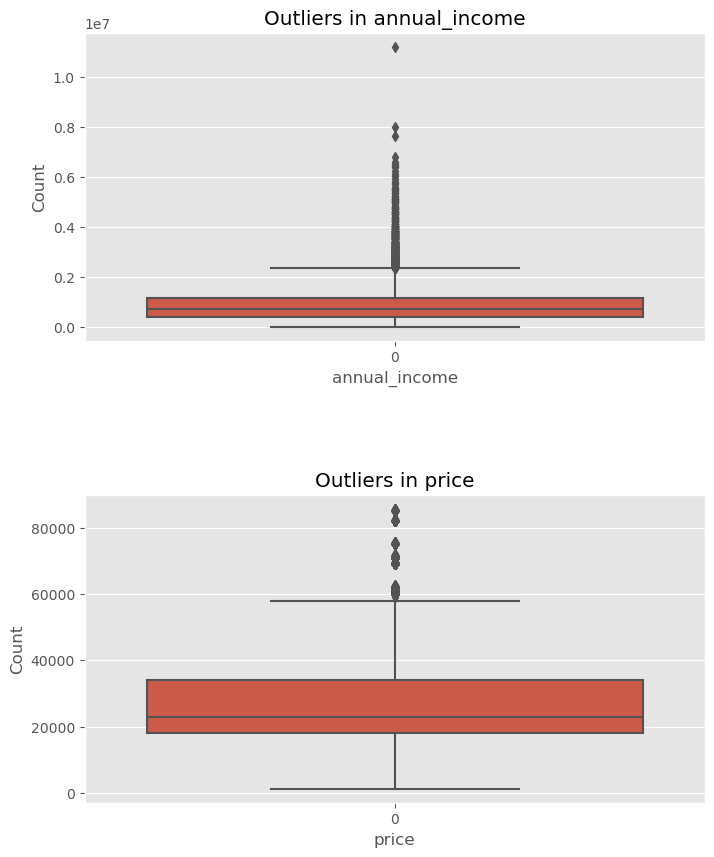

In [161]:
#outilers detection
# Create subplots for outlier detection
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 5 * len(numerical_columns)))
fig.subplots_adjust(hspace=0.5)


# Iterate through numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(data[column], ax=axes[i])
    axes[i].set_title(f'Outliers in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

Removing Outliers

In [162]:
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return df_filtered

# Remove outliers from specified numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create a new DataFrame to store the filtered data
filtered_data = data.copy()

# Iterate through numerical columns, remove outliers, and update the filtered DataFrame
for column in numerical_columns:
    filtered_data = remove_outliers_iqr(filtered_data, column)

In [163]:
filtered_data

,car_id,tanggal,customer_name,gender,annual_income,dealer_name,company,model,engine,transmission,color,price,body_style,dealer_region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,Passenger,Pasco
23902,C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,Hardtop,Middletown
23903,C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,Sedan,Scottsdale
23904,C_CND_023905,2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,Passenger,Austin


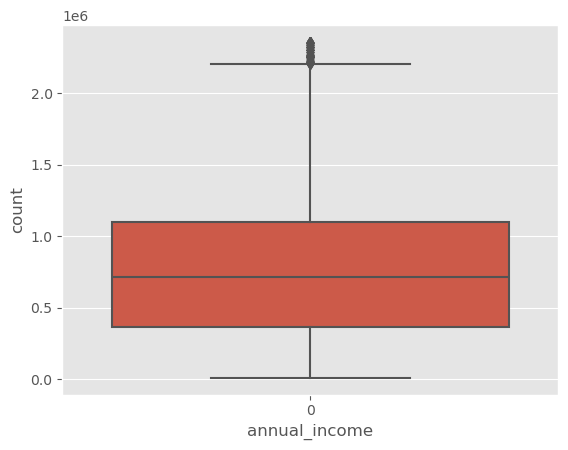

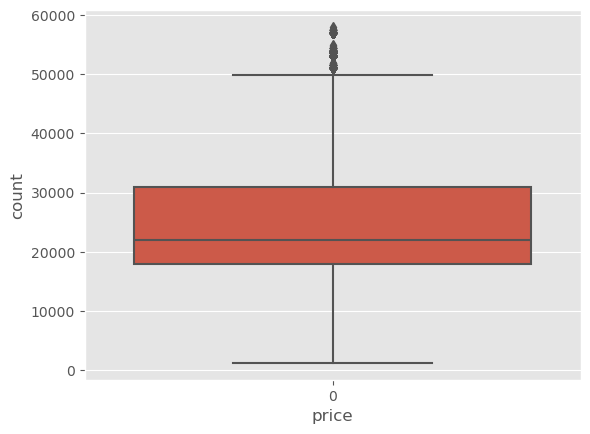

In [164]:
for i in filtered_data.columns:
    if((filtered_data[i].dtype == 'int64') or (filtered_data[i].dtype == 'float64')):
        sns.boxplot(filtered_data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

untuk mengecek harga terendah dan tertinggi

In [165]:
# Calculate the mean and standard deviation of the price column
mean_price = filtered_data['price'].mean()
std_price = filtered_data['price'].std()

# Calculate the 95% confidence interval for the mean price
n = len(filtered_data['price'])
margin_of_error = stats.t.ppf(0.975, n-1) * std_price / np.sqrt(n)
confidence_interval = [mean_price - margin_of_error, mean_price + margin_of_error]

print('Confidence interval for the mean price:', confidence_interval)

Confidence interval for the mean price: [25286.99126716264, 25571.18451750805]


menampilkan kolom price

In [166]:
filtered_data['price']

0        26000
1        19000
2        31500
3        14000
4        24500
         ...  
23901    12000
23902    16000
23903    21000
23904    31000
23905    27500
Name: price, Length: 21697, dtype: int64

### save clean data

In [167]:
save = pd.DataFrame(filtered_data)
save.to_csv('car_clean.csv',index=False)

# Data Exploration

Pada bagian **Data Exploration** ini akan dilakukan analisa untuk mengetahui penjualan mobil dan memenuhi kebutuhan pelanggan   berdasarkan spesifikasi, harga, dan preferensi pelanggan.  

analisis dealer

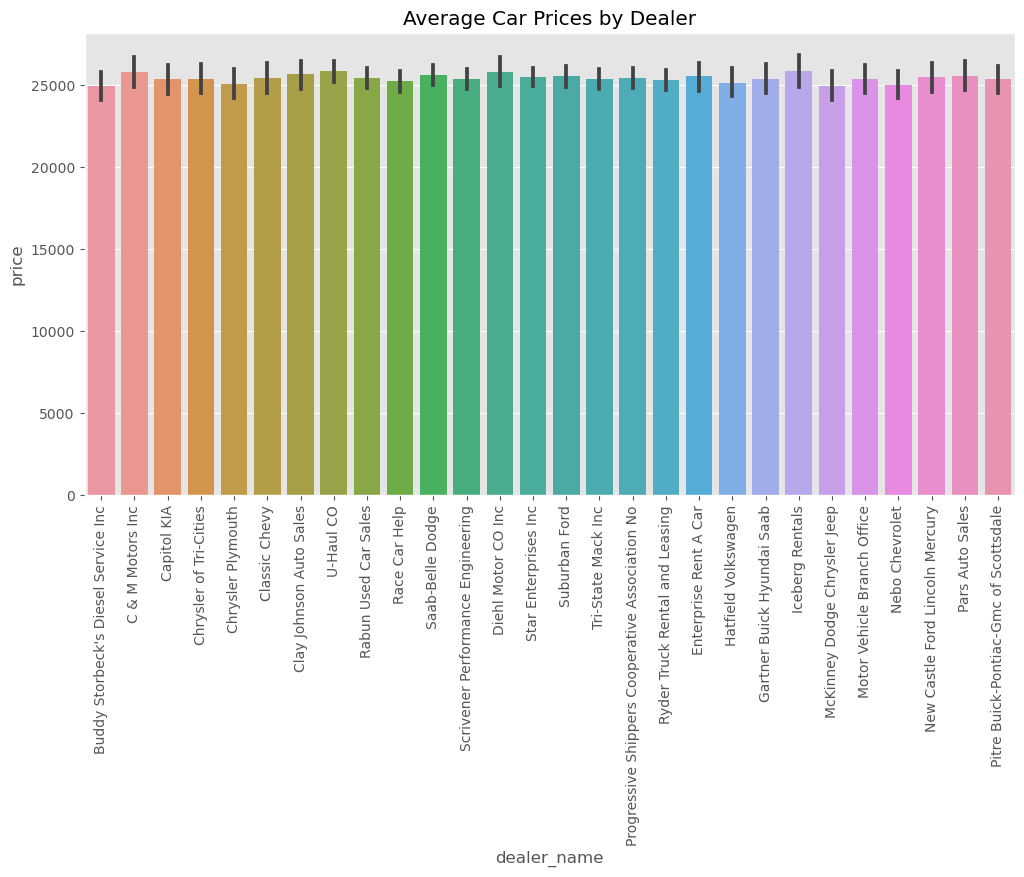

In [168]:
# Dealer Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='dealer_name', y='price', data=filtered_data)
plt.title('Average Car Prices by Dealer')
plt.xticks(rotation=90)
plt.show()

penjualan terbanyak dan terdikit

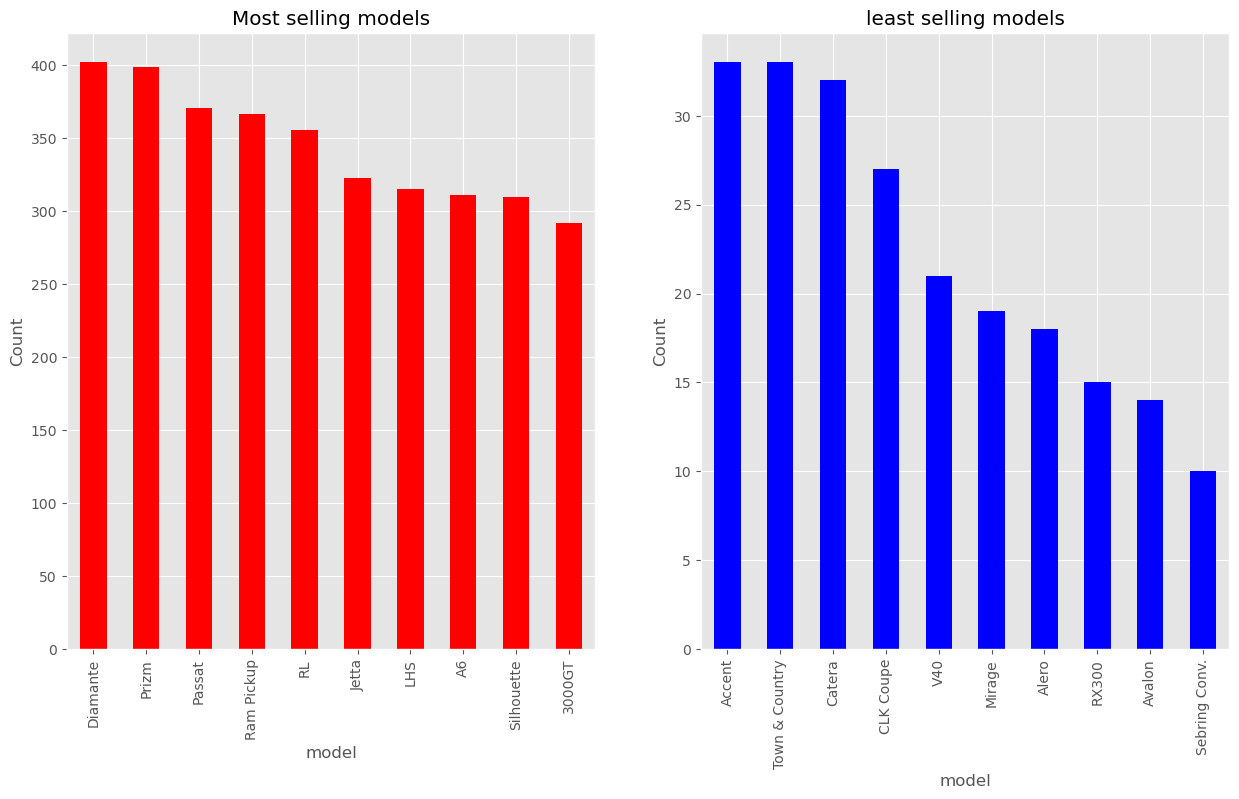

In [169]:
fig,ax=plt.subplots(1,2,figsize=(15,8))

top_models=filtered_data.model.value_counts().head(10)
least_models=filtered_data.model.value_counts().tail(10)

top_models.plot(kind='bar',color='r',ax=ax[0])
ax[0].set_title('Most selling models')
ax[0].set_ylabel('Count')

least_models.plot(kind='bar',color='b',ax=ax[1])
ax[1].set_title('least selling models')
ax[1].set_ylabel('Count')

plt.show()

jumlah penjualan mobil per merk

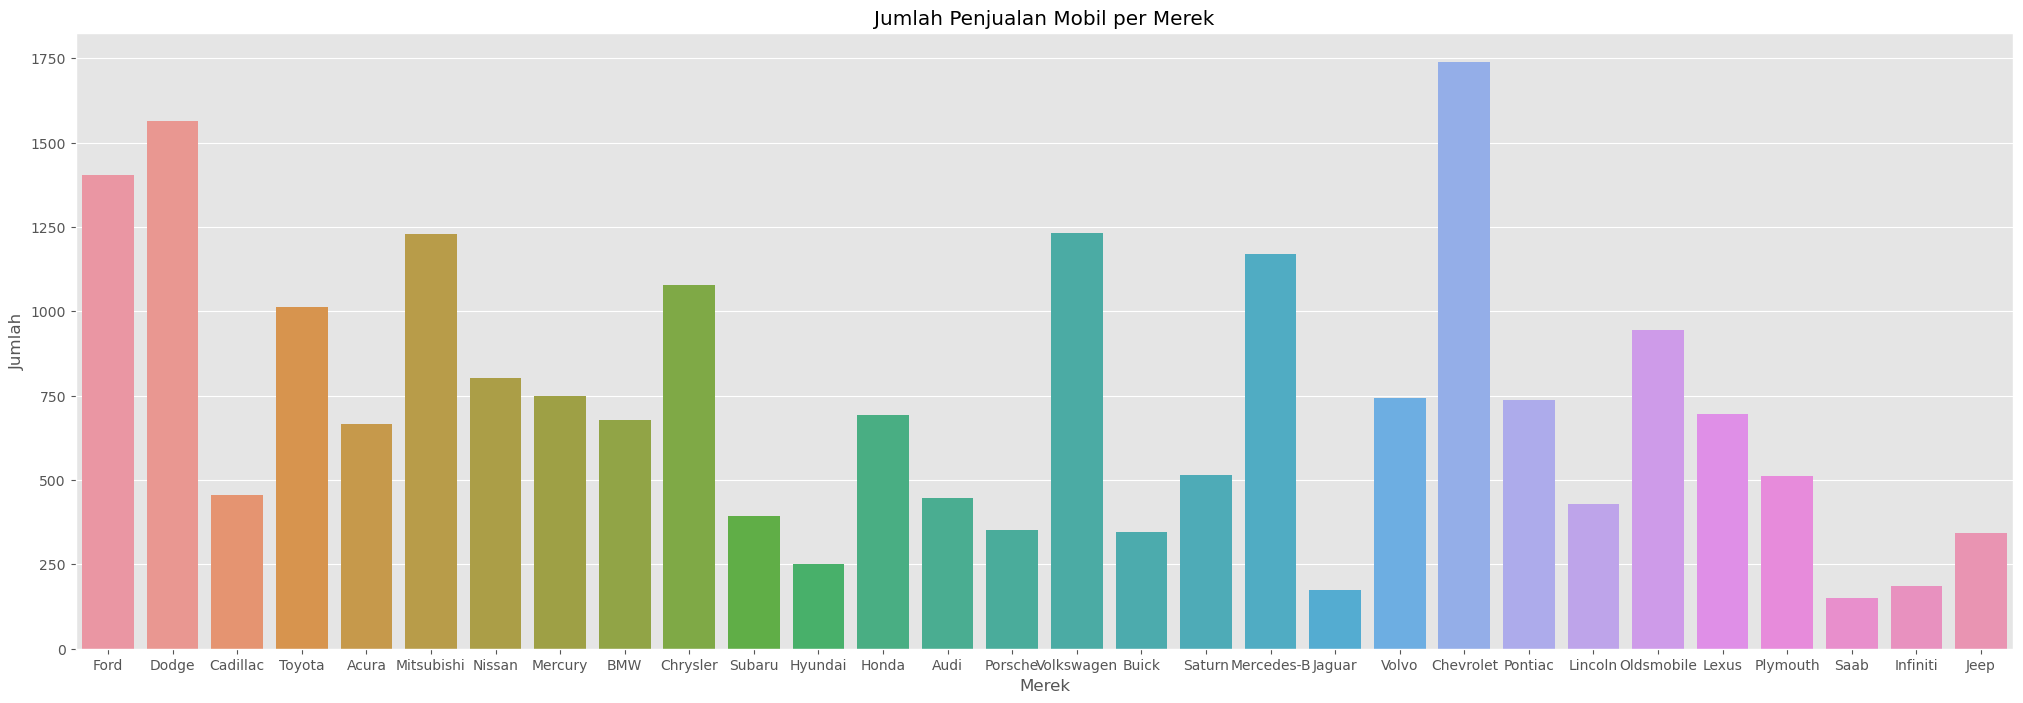

In [170]:
plt.figure(figsize=(25,8))
sns.countplot(x = 'company', data = filtered_data)
plt.title('Jumlah Penjualan Mobil per Merek')
plt.xlabel('Merek')
plt.ylabel('Jumlah')
plt.show()

penjualan mobil per body style

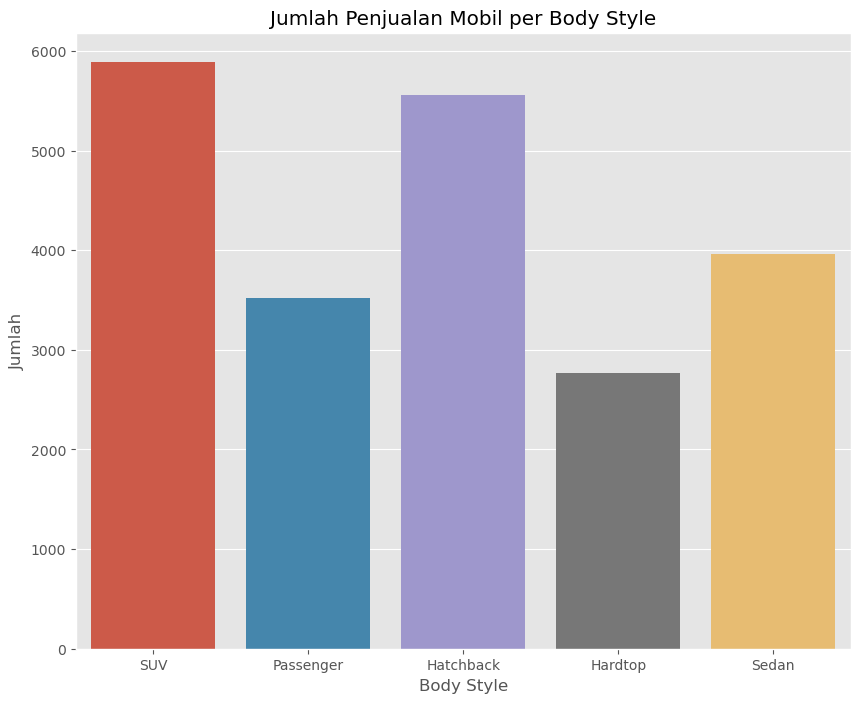

In [171]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'body_style', data = filtered_data)
plt.title('Jumlah Penjualan Mobil per Body Style')
plt.xlabel('Body Style')
plt.ylabel('Jumlah')
plt.show()

jumlah penjualan mobil per wilayah dealer

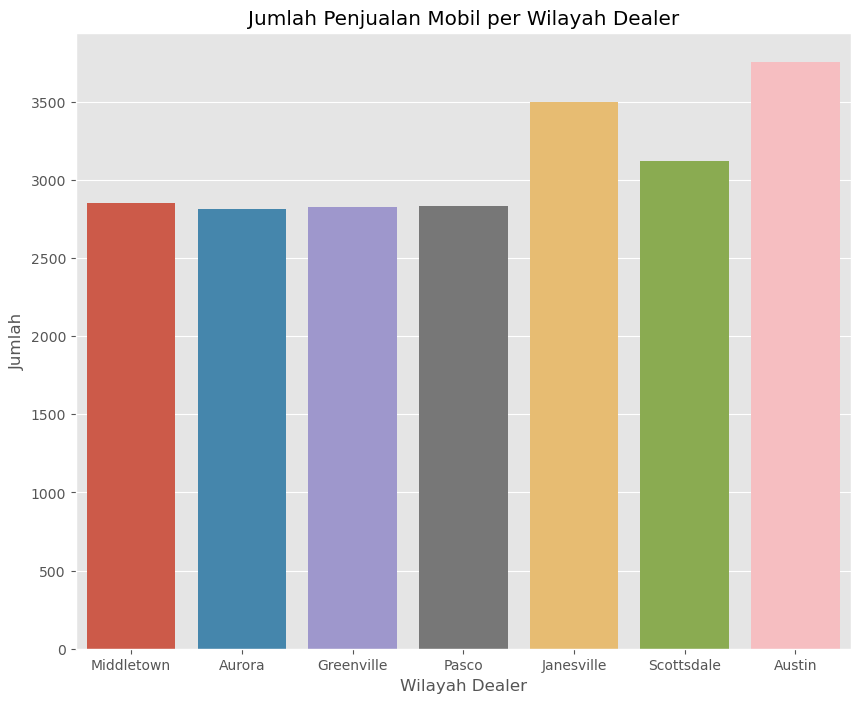

In [174]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'dealer_region', data = filtered_data)
plt.title('Jumlah Penjualan Mobil per Wilayah Dealer')
plt.xlabel('Wilayah Dealer')
plt.ylabel('Jumlah')
plt.show()

jumlah penjualan mobil per gender

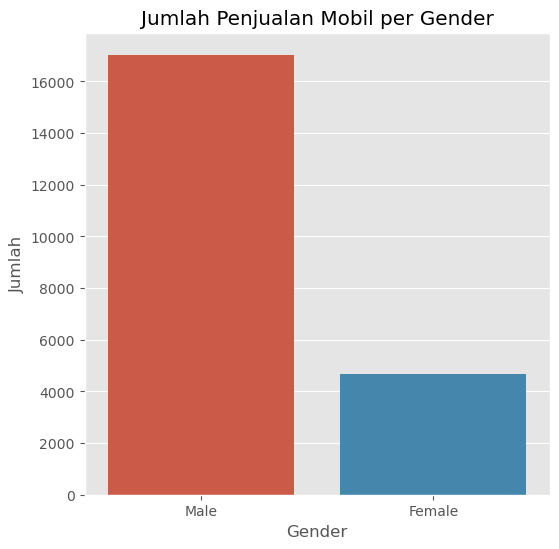

In [175]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'gender', data = filtered_data)
plt.title('Jumlah Penjualan Mobil per Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

In [177]:
filtered_data[['price']].describe()

,price
count,21697.000000
mean,25429.087892
std,10678.525476
min,1200.000000
25%,18000.000000
50%,22001.000000
75%,31000.000000
max,57990.000000


* price max :	57990.000000
* price min :   1200.000000

* h0: terdapat perdebaan harga antar gender
* h1: tidak terdapat perbedaan antar gender

In [178]:
from scipy import stats

laki_laki = filtered_data[filtered_data['gender'] == 'Male']['price']
perempuan = filtered_data[filtered_data['gender'] == 'Female']['price']

t_stat, p_val = stats.ttest_ind(laki_laki, filtered_data['price'])
print(t_stat, p_val) 

t_stat1, p_val1 = stats.ttest_ind(perempuan, filtered_data['price'])
print(t_stat1, p_val1)

-0.038584436800333945 0.9692219095608434
0.08925666872143347 0.9288786080626934


 terlihat bahwa nilai t-statistik untuk kelompok laki-laki adalah -0.0386 dengan nilai p-value 0.9692, sedangkan untuk kelompok perempuan adalah 0.0893 dengan nilai p-value 0.9289. Dengan melihat nilai p-value yang lebih besar dari 0,05, kita dapat menyimpulkan bahwa tidak ada bukti statistik yang cukup untuk menolak hipotesis nol, yaitu bahwa rata-rata kedua kelompok data tidak berbeda signifikan.

Hal ini berarti bahwa harga di kelompok laki-laki dan perempuan tidak signifikan berbeda, yang berarti bahwa gender tidak memiliki pengaruh signifikan terhadap harga.

Is this conversation helpful so far?





In [179]:
filtered_data.groupby('gender')[['price']].mean()

,price
gender,
Female,25444.486597
Male,25424.872549


Untuk menginterpretasikan nilai t-statistik dan p-value dari t-test independen, Anda dapat menyimpulkan bahwa:

* Tidak ada bukti statistik yang mendukung perbedaan signifikan antara harga rata-rata kelamin perempuan dan laki-laki, sehingga kedua rata-rata harga ini dapat dianggap sama (t-statistik = -0.0386, p-value = 0.9692).

* Tidak ada bukti statistik yang mendukung perbedaan signifikan antara harga rata-rata kelamin perempuan dan harga rata-rata keseluruhan semua data, sehingga kedua rata-rata harga ini dapat dianggap sama (t-statistik = 0.0893, p-value = 0.9289).
Hal ini menunjukkan bahwa kelamin tidak memiliki efek signifikan terhadap harga.